<a href="https://colab.research.google.com/github/choudhurysibani120/Telecom-churn-prediction/blob/main/sibani_choudhury_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

This is a individual notebook for project.

**NAME- Sibani Choudhury**

Objective 

• Understanding the data

• Check the descriptive statistics of numeric 

• Check the various attributes of data like shape(rows and cols), null values , unique values

• Find the categorical and numeric data and plot the distribution

• Analysing the number of churn customers by both categorical and numerical data

• Plot the correlation between the variables and churn

In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math
from numpy import loadtxt
import seaborn as sns
import sweetviz as sv
import IPython
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the data file


In [ ]:
Churn_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECTS/Telecom Churn.csv')

Look at the top 5 records of the data

In [ ]:
Churn_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Look at the last 5 records of the data

In [ ]:
Churn_dataset.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
#More details about the data
Churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
#check the descriptive statistics of numeric variables 
Churn_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Check the various attributes of data like shape(rows and cols), null values,unique values.

In [ ]:
print ("Rows     : " ,Churn_dataset.shape[0])
print ("Columns  : " ,Churn_dataset.shape[1])
print ("\nFeatures : \n" ,Churn_dataset.columns.tolist())
print ("\nMissing values :  ", Churn_dataset.isnull().sum().values.sum())
print ("\nUnique values :  \n",Churn_dataset.nunique())

Rows     :  3333
Columns  :  20

Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

Missing values :   0

Unique values :  
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls         

STATE: 51 Unique States in United States of America

Account Length. Length of The Account

Area Code 

International Plan Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages Number of Voice Mail Messages ranging from 0 to 50

Total day minutes Total Number of Minutes Spent By Customers in Morning

Total day calls Total Number of Calls made by Customer in Morning.

Total day charge Total Charge to the Customers in Morning.

Total eve minutesTotal Number of Minutes Spent By Customers in Evening

Total eve calls Total Number of Calls made by Customer in Evening.

Total eve charge Total Charge to the Customers in Morning.

Total night minutes Total Number of Minutes Spent By Customers in the Night.

Total night calls Total Number of Calls made by Customer in Night.

Total night charge Total Charge to the Customers in Night.

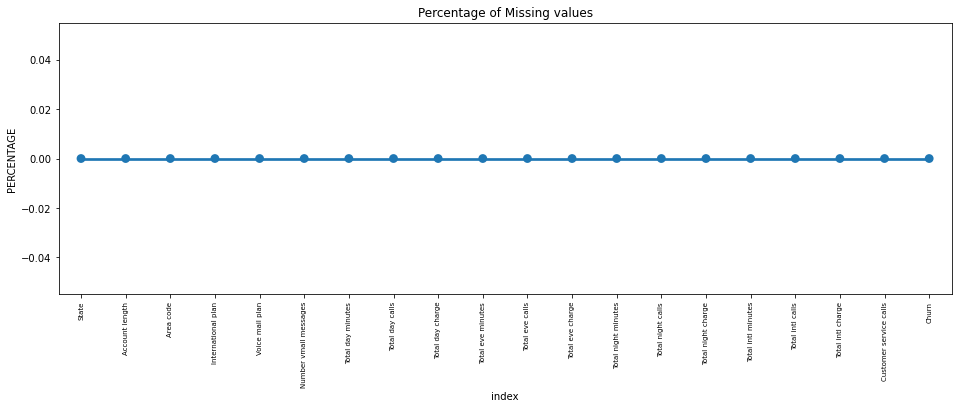

In [ ]:
missing = pd.DataFrame((Churn_dataset.isnull().sum())*100/Churn_dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Here we dont have any missing value.

In [ ]:
Churn_dataset['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

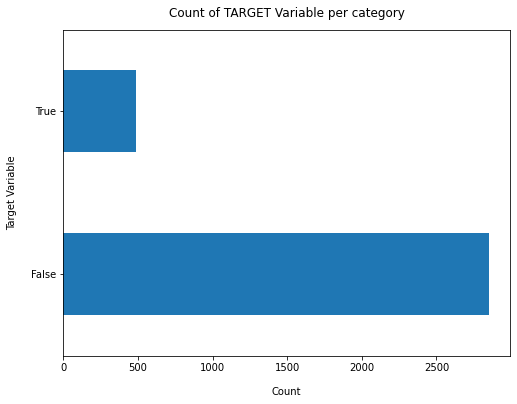

In [ ]:
Churn_dataset['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:

100*Churn_dataset['Churn'].value_counts()/len(Churn_dataset['Churn'])

False    85.508551
True     14.491449
Name: Churn, dtype: float64

checking the churn rate

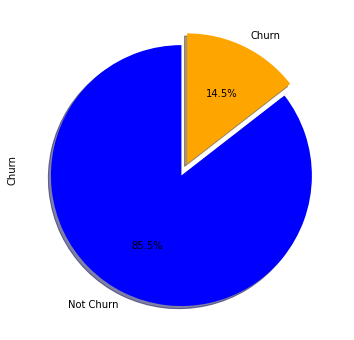

In [ ]:
Churn_dataset['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn','Churn'],
                               colors=['blue','orange'],
                               explode=[0.05,0.05]
                              )

Data is highly imbalanced, ratio = 85:15

So we analyse the data with other features

In [ ]:
Churn_dataset.duplicated().any()

False

There are no duplicated values

**Exploratory data Analysis**

Lets identify categorical and numerical features

In [ ]:
#Categorical Data
Churn_dataset_cat = Churn_dataset.select_dtypes(exclude=["number","float_"])

In [ ]:
Churn_dataset_cat.head()

,State,International plan,Voice mail plan,Churn
0,KS,No,Yes,False
1,OH,No,Yes,False
2,NJ,No,No,False
3,OH,Yes,No,False
4,OK,Yes,No,False


In [ ]:
Churn_dataset_num = Churn_dataset.select_dtypes(exclude=["bool_","object_"])
Churn_dataset_num.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbde9a85e90>,
      dtype=object)

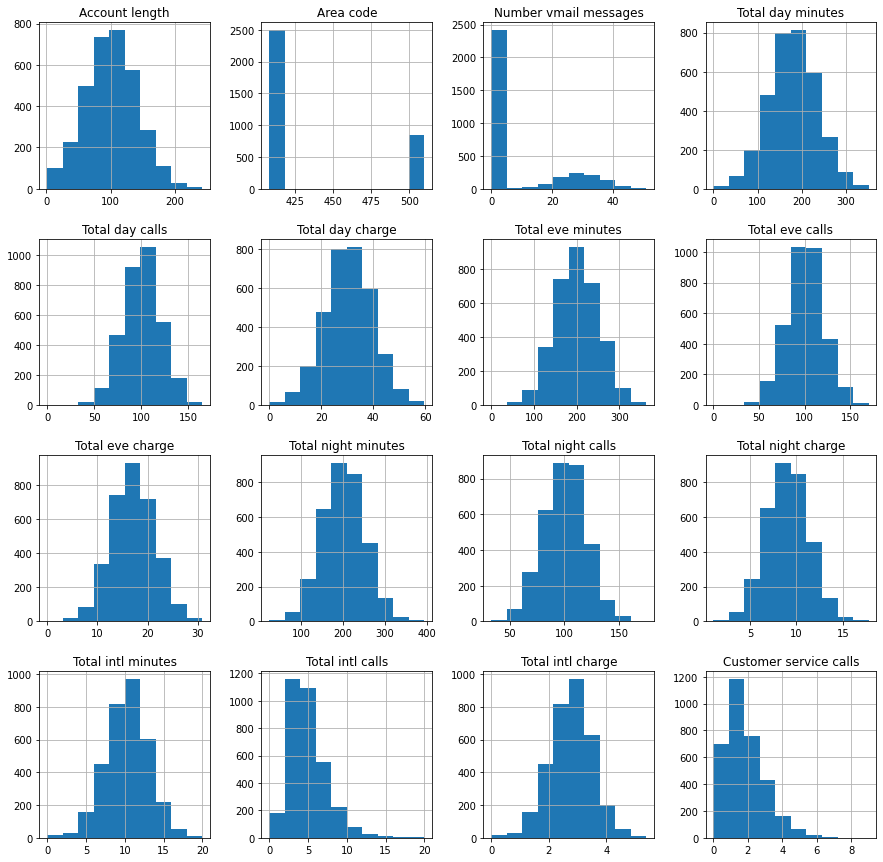

In [ ]:
Churn_dataset_num.hist(figsize= (15,15))

The account length, total day calls, total night calls etc are normally distributed. The customer service calls is rightly skwed as the density is more on the left side. The number vmail message and  customer service calls are biased.

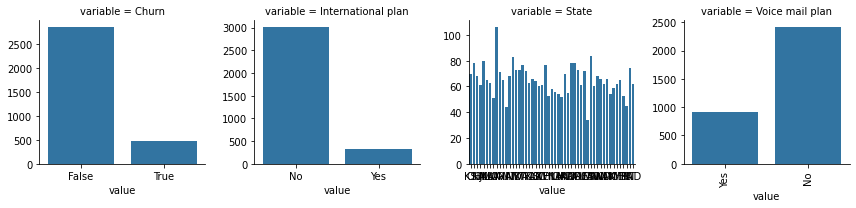

In [ ]:
f= pd.melt(Churn_dataset, value_vars=sorted(Churn_dataset_cat))
g = sns.FacetGrid(f, col ='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g =g.map(sns.countplot, "value")
(plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat)
g.fig.tight_layout()
plt.show()

Churn According to States

In [ ]:
Churn_dataset['State'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

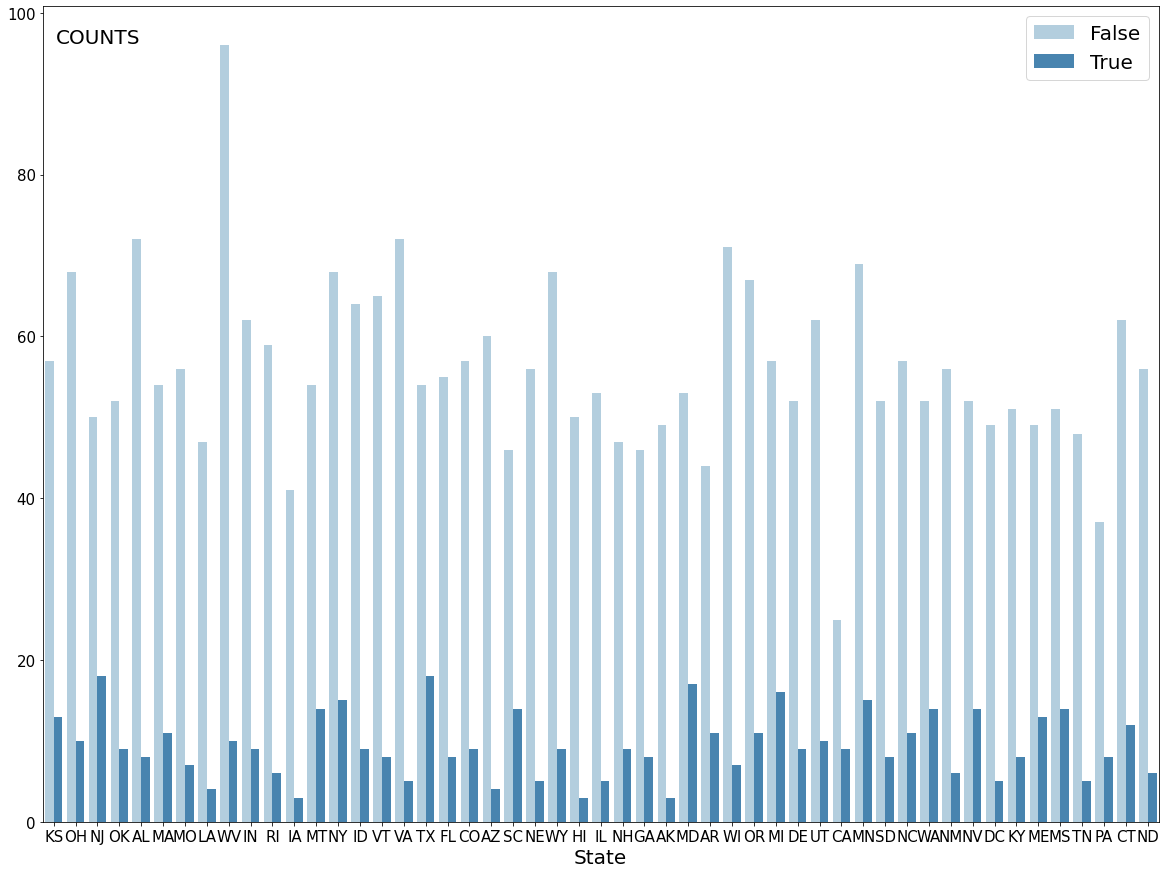

In [ ]:
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='State', hue='Churn', data=Churn_dataset, palette='Blues')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

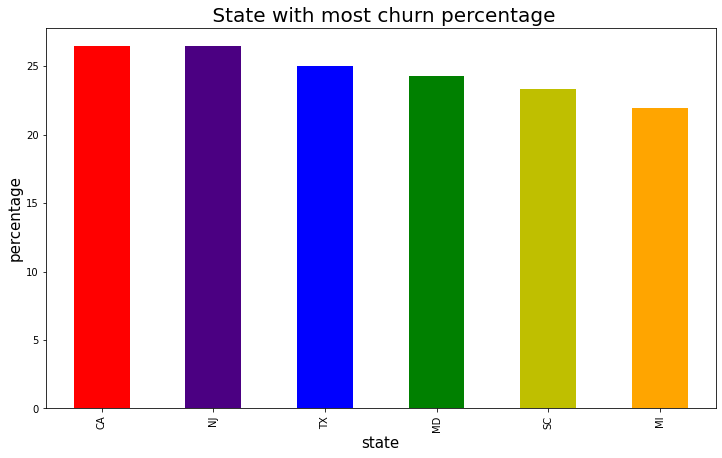

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (12, 7)

color = plt.cm.copper(np.linspace(0, 0.5, 20))
((Churn_dataset.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['red','indigo','b','g','y','orange'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

Churn according to  Account length

In [ ]:
Churn_dataset[Churn_dataset['Account length']<=9].loc[:,['Churn']].value_counts()

Churn
False    22
True      2
dtype: int64

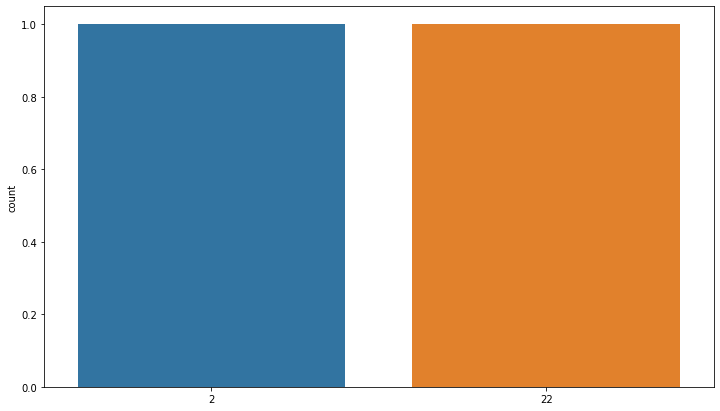

In [ ]:
sns.countplot(Churn_dataset[Churn_dataset['Account length']<=9].loc[:,['Churn']].value_counts())

churn according to Area code

In [ ]:
Churn_dataset['Area code'].unique()

array([415, 408, 510])

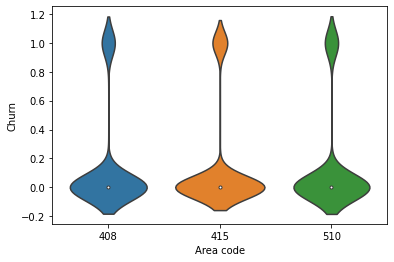

In [ ]:
sns.violinplot(x="Area code", y="Churn", data =Churn_dataset, size=8)
plt.show()

Churn according to the Voice-Mail Feature

In [ ]:
print('Unique vmail messages',Churn_dataset['Number vmail messages'].unique())
Churn_dataset['Number vmail messages'].describe()

Unique vmail messages [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]


count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

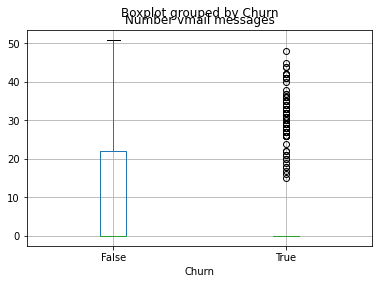

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
Churn_dataset.boxplot(column='Number vmail messages', by='Churn')

We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature or setting a limit and check whether a customer is retianed.
¶
According to my hypothesis :
*1.Voice-Mail Service Upgradation
 2.Setting up a limit on Voice-Mail service strictly no more than 25 voice mails.
  3.Quality Drop in Voice-Mail after 25 voice mails.*

Morning time affecting the churn rate

In [ ]:
print('Maximum number of minutes:',Churn_dataset['Total day minutes'].max(),'i.e. Max number of Hours  spent:',round(Churn_dataset['Total day minutes'].max()/60))
print('Maximum number of minutes:',Churn_dataset['Total day minutes'].min())
print('Average number of minutes:',Churn_dataset['Total day minutes'].mean())

Maximum number of minutes: 350.8 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 0.0
Average number of minutes: 179.77509750975116


In [ ]:
print('Maximum number of calls:',Churn_dataset['Total day charge'].max())
print('Minimum number of calls:',Churn_dataset['Total day charge'].min())
print('Average number of calls:',Churn_dataset['Total day charge'].mean())

Maximum number of calls: 59.64
Minimum number of calls: 0.0
Average number of calls: 30.562307230723093


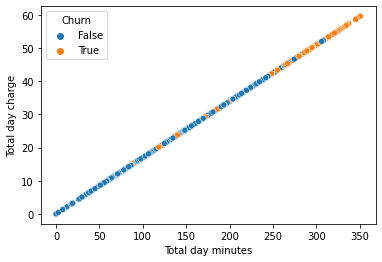

In [ ]:
cdd = sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=Churn_dataset)

In [ ]:
print('Maximum number of calls:',Churn_dataset['Total day calls'].max())
print('Minimum number of calls:',Churn_dataset['Total day calls'].min())
print('Average number of calls:',Churn_dataset['Total day calls'].mean())

Maximum number of calls: 165
Minimum number of calls: 0
Average number of calls: 100.43564356435644


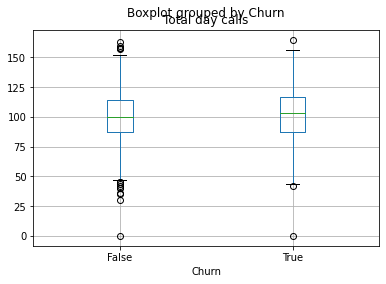

In [ ]:
plt.show()
Churn_dataset.boxplot(column='Total day calls', by='Churn')

We can infere here that on an average a 100 calls are made which is a good indication for the company.But we can also note that for the churn customer the median is slightly higher than 100 which indicates there are call drops which may lead to more calls in a morning

Evening time Affecting the Churn Rate

In [ ]:
print('Maximum number of minutes:',Churn_dataset['Total eve minutes'].max(),'i.e. Max number of Hours  spent:',round(Churn_dataset['Total eve minutes'].max()/60))
print('Maximum number of minutes:',Churn_dataset['Total eve minutes'].min())
print('Average number of minutes:',Churn_dataset['Total eve minutes'].mean())

Maximum number of minutes: 363.7 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 0.0
Average number of minutes: 200.98034803480346


In [ ]:
print('Maximum number of charge:',Churn_dataset['Total eve charge'].max())
print('Minimum number of charge:',Churn_dataset['Total eve charge'].min())
print('Average number of charge:',Churn_dataset['Total eve charge'].mean())

Maximum number of charge: 30.91
Minimum number of charge: 0.0
Average number of charge: 17.083540354035392


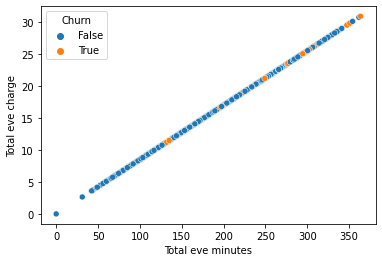

In [ ]:
cdd = sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=Churn_dataset)

In [ ]:
print('Maximum number of calls:',Churn_dataset['Total eve calls'].max())
print('Minimum number of calls:',Churn_dataset['Total eve calls'].min())
print('Average number of calls:',Churn_dataset['Total eve calls'].mean())

Maximum number of calls: 170
Minimum number of calls: 0
Average number of calls: 100.11431143114311


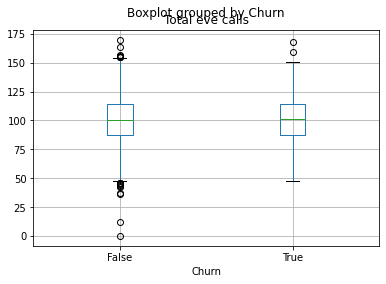

In [ ]:
Churn_dataset.boxplot(column='Total eve calls', by='Churn')
plt.show()

Night Time Affecting Churn Rate 

In [ ]:
print('Maximum number of minutes:',Churn_dataset['Total night minutes'].max(),'i.e. Max number of Hours  spent:',round(Churn_dataset['Total night minutes'].max()/60))
print('Minimum number of minutes:',Churn_dataset['Total night minutes'].min())
print('Average number of minutes:',Churn_dataset['Total night minutes'].mean())

Maximum number of minutes: 395.0 i.e. Max number of Hours  spent: 7
Minimum number of minutes: 23.2
Average number of minutes: 200.87203720372048


In [ ]:
print('Maximum number of charge:',Churn_dataset['Total night charge'].max())
print('Minimum number of charge:',Churn_dataset['Total night charge'].min())
print('Average number of charge:',Churn_dataset['Total night charge'].mean())

Maximum number of charge: 17.77
Minimum number of charge: 1.04
Average number of charge: 9.039324932493264


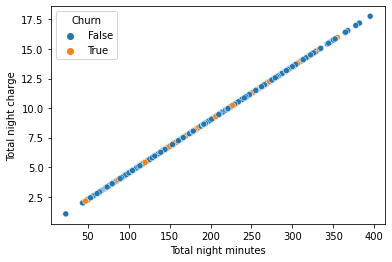

In [ ]:
cdd = sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=Churn_dataset)

In [ ]:
print('Maximum number of calls:',Churn_dataset['Total night calls'].max())
print('Minimum number of calls:',Churn_dataset['Total night calls'].min())
print('Average number of calls:',Churn_dataset['Total night calls'].mean())

Maximum number of calls: 175
Minimum number of calls: 33
Average number of calls: 100.10771077107711


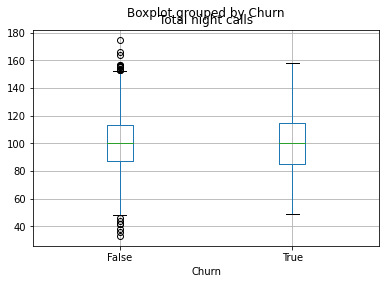

In [ ]:
Churn_dataset.boxplot(column='Total night calls', by='Churn')
plt.show()

Still Calls are made more by the churned customers

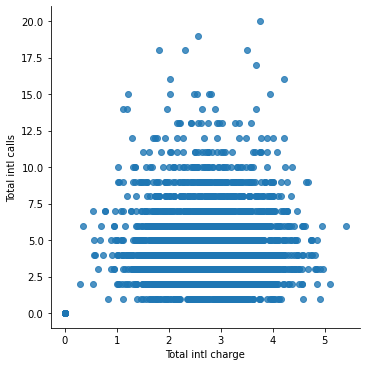

In [ ]:
sns.lmplot(data=Churn_dataset, x='Total intl charge', y='Total intl calls', fit_reg=False)

 Build a corelation of all predictors with 'Churn'

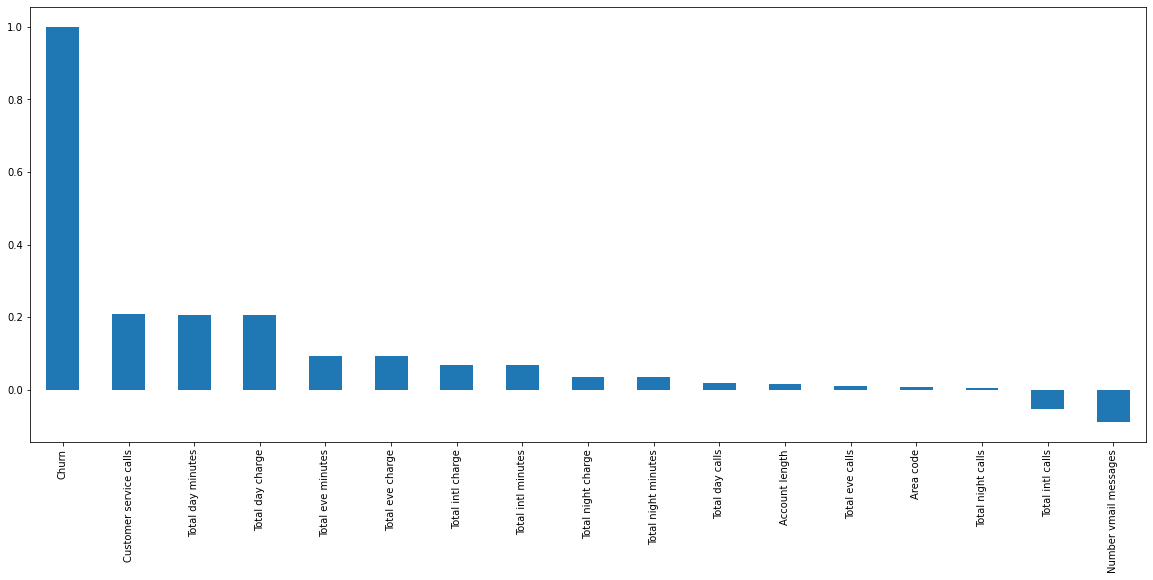

In [ ]:
plt.figure(figsize=(20,8))
Churn_dataset.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

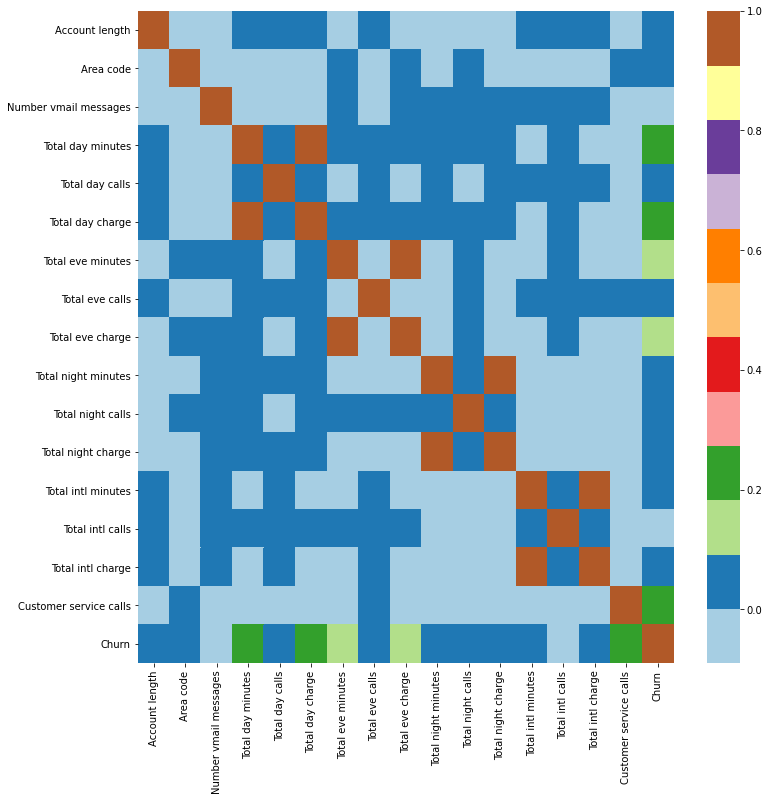

In [ ]:
 plt.figure(figsize=(12,12))
sns.heatmap(Churn_dataset.corr(), cmap="Paired")

Lets generate the EDA report by using sweetviz library

In [ ]:
import sweetviz as sv
report = sv.analyze(Churn_dataset)
report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



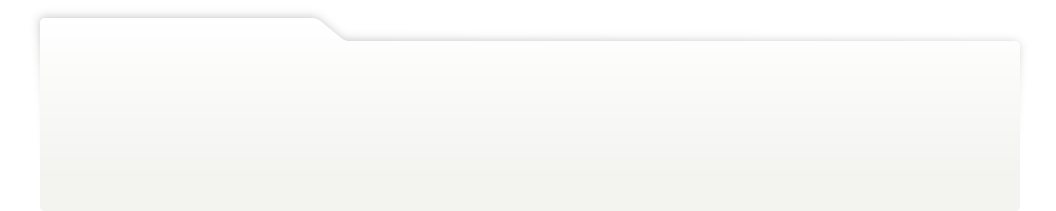
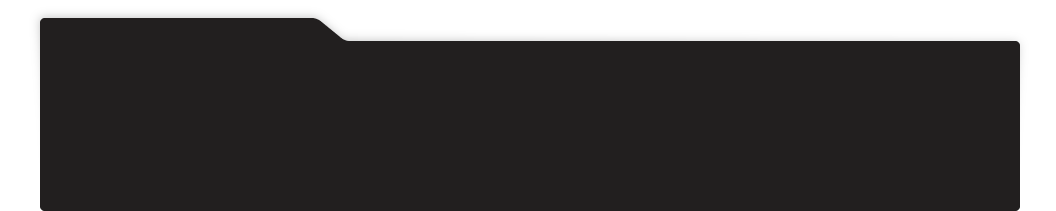
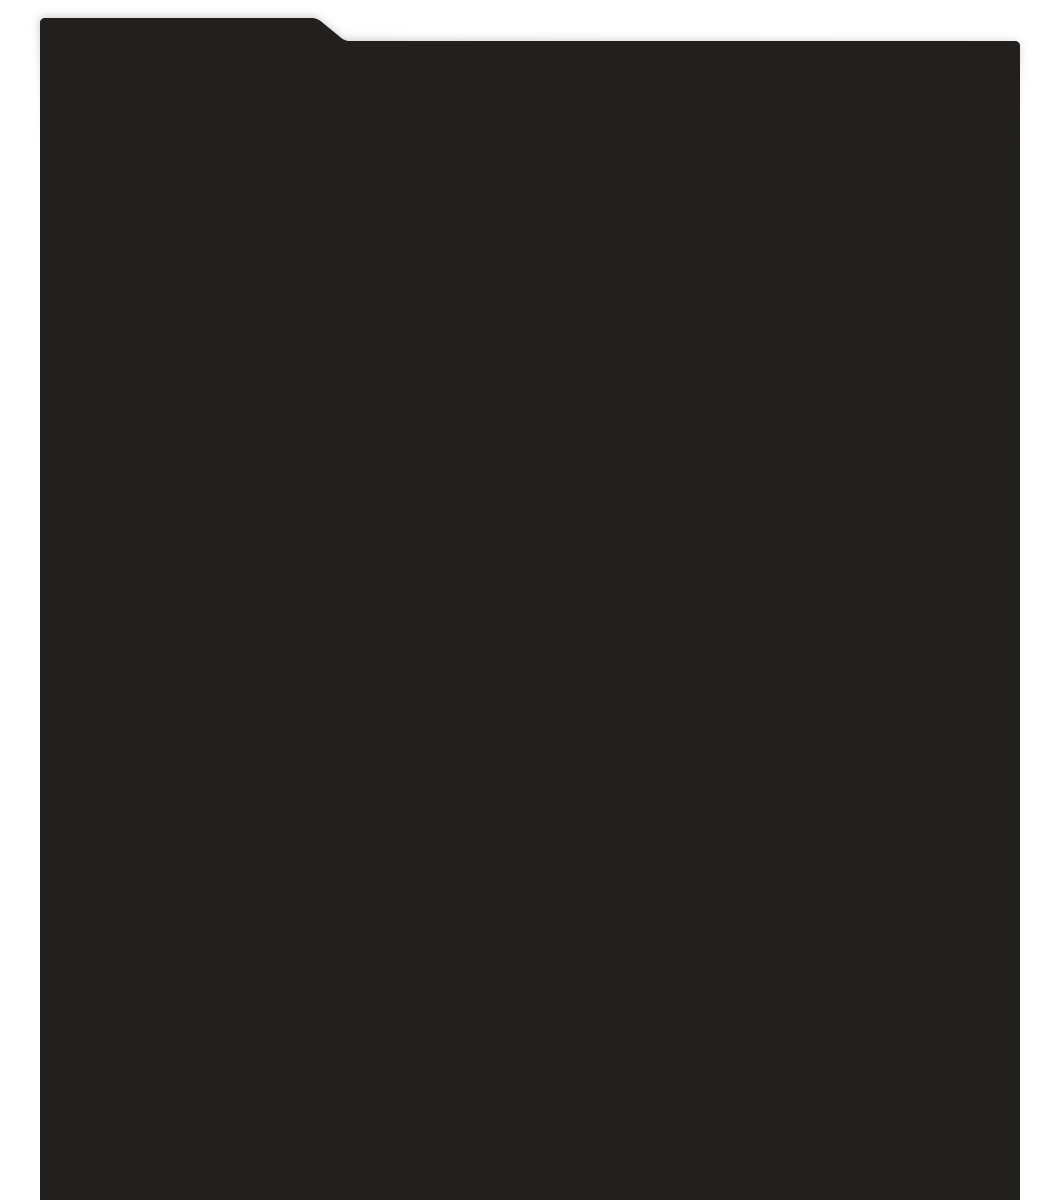
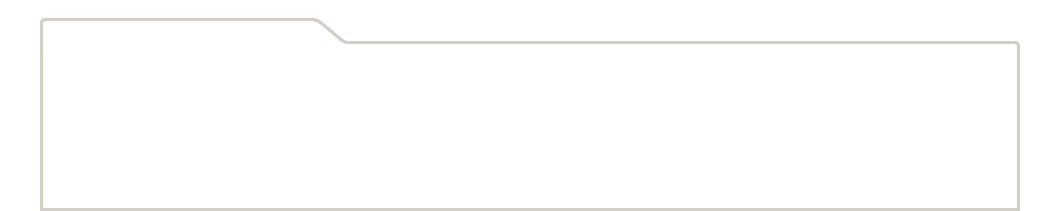
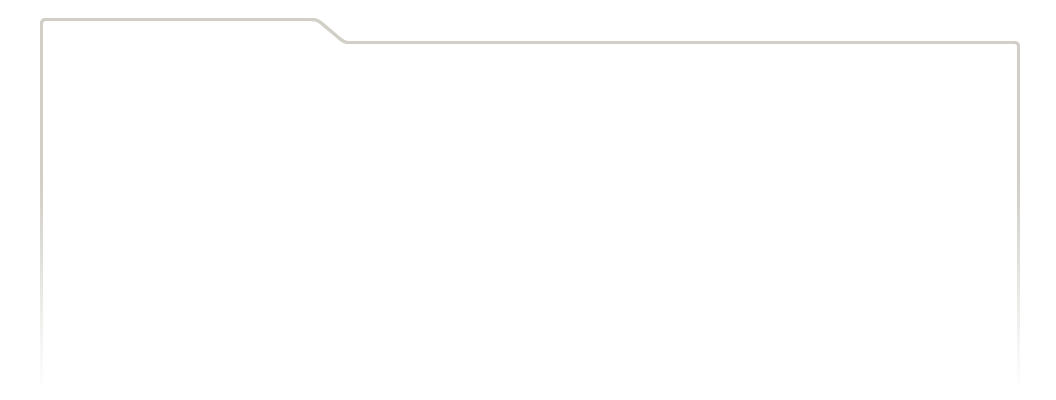
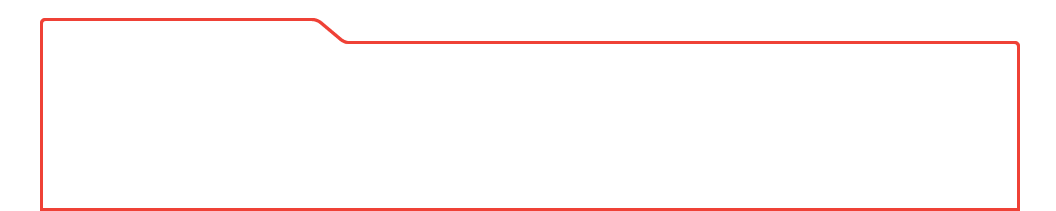
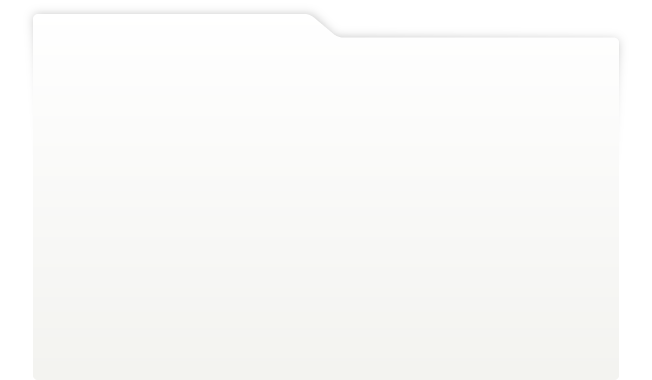
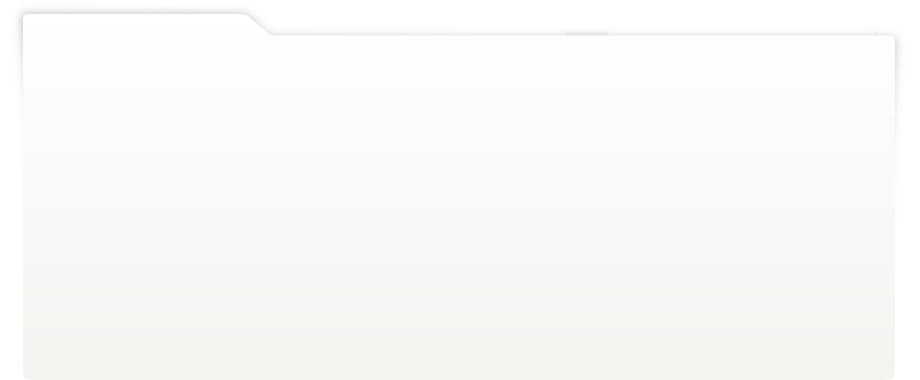
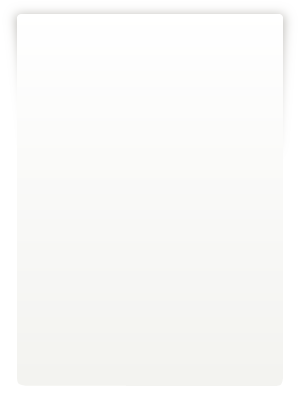
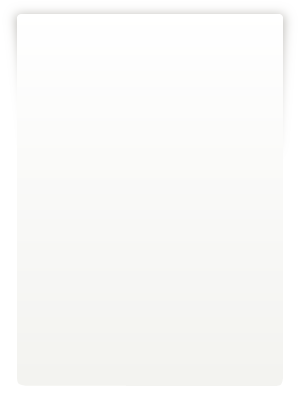
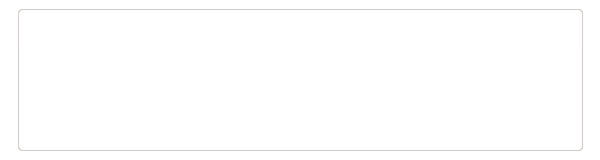
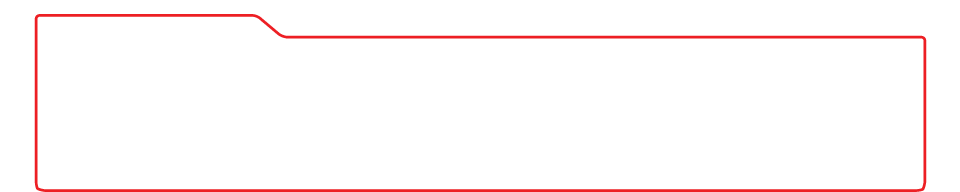
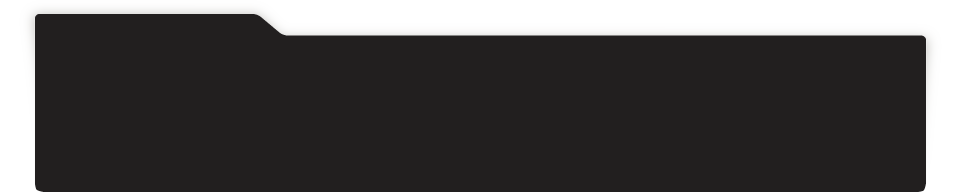
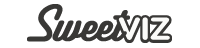
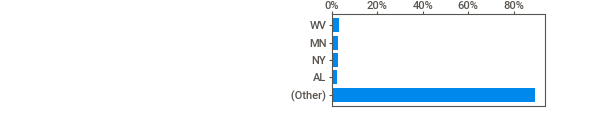
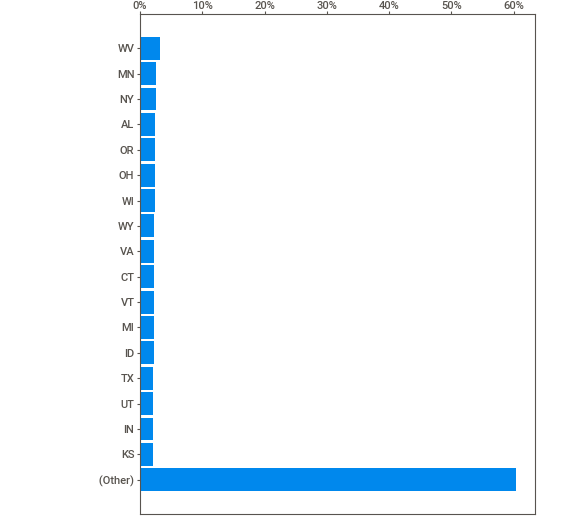
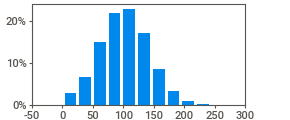
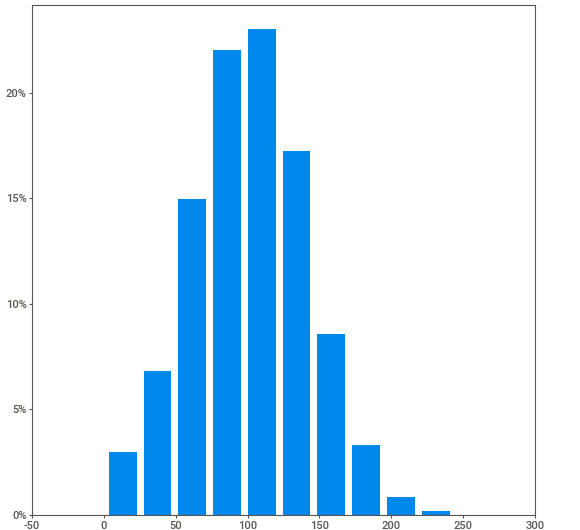
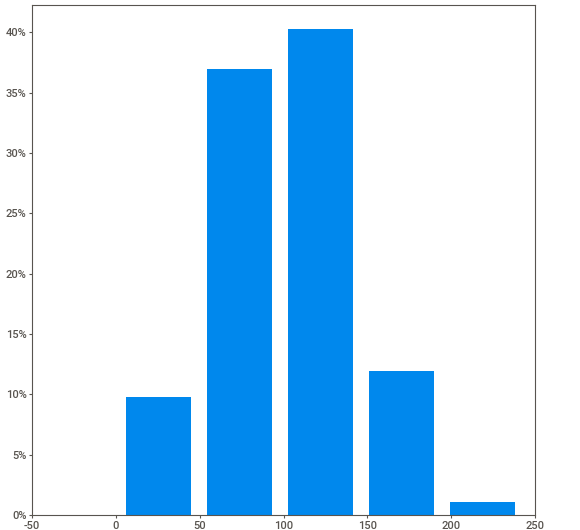
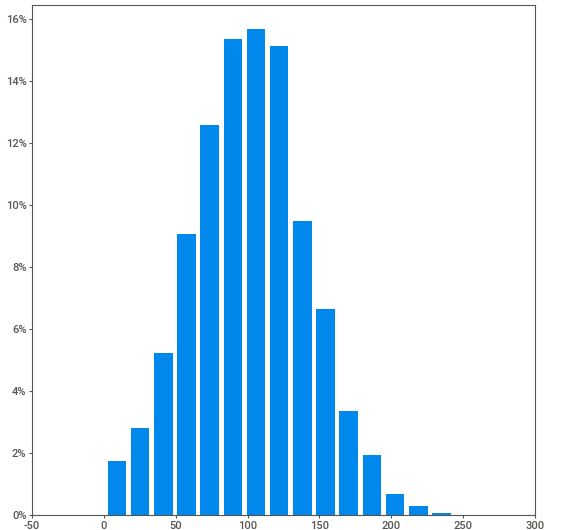
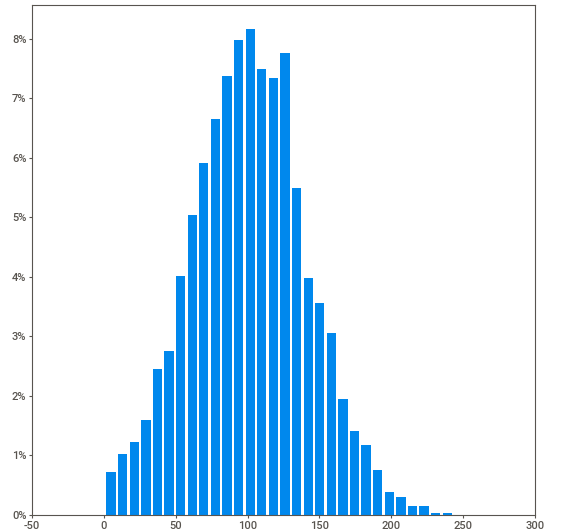
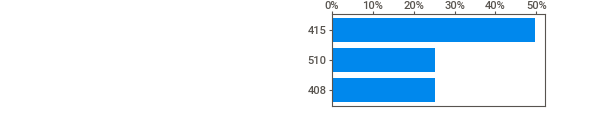
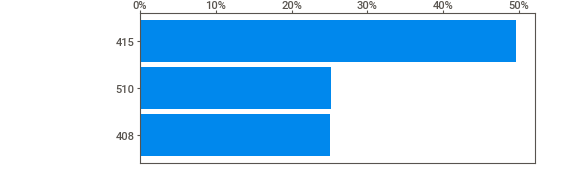
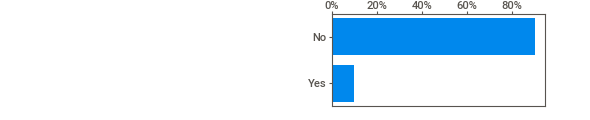
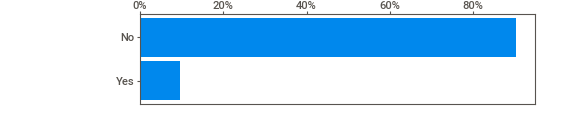
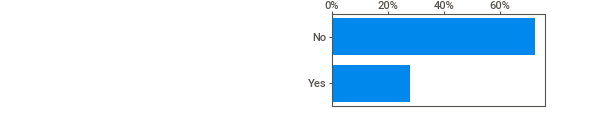
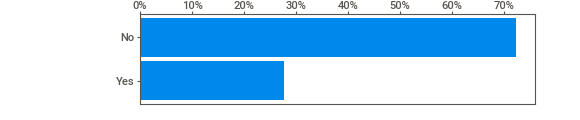
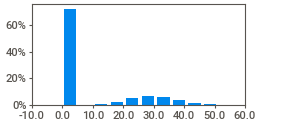
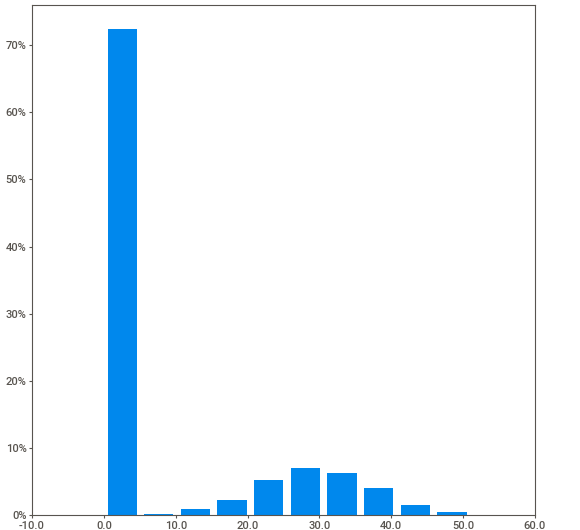
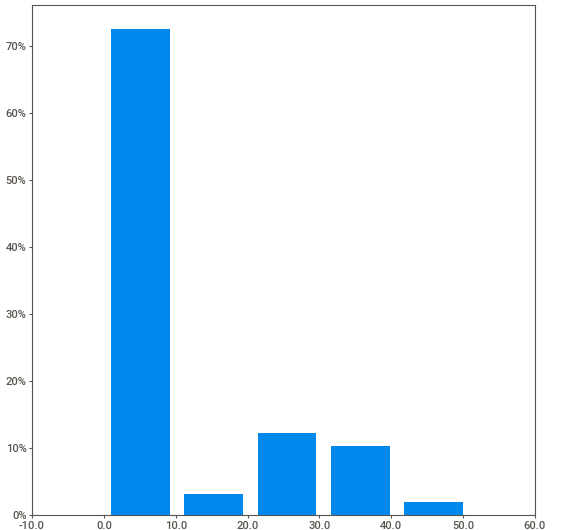
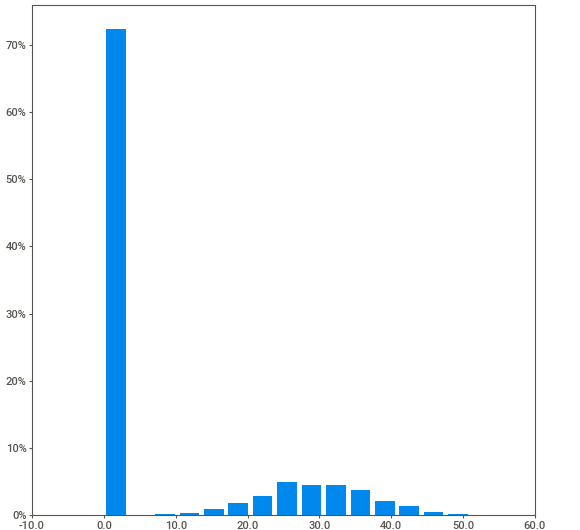
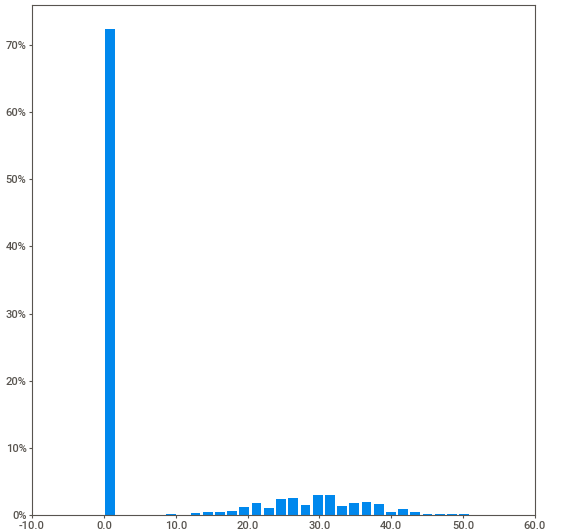
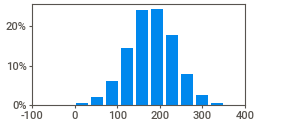
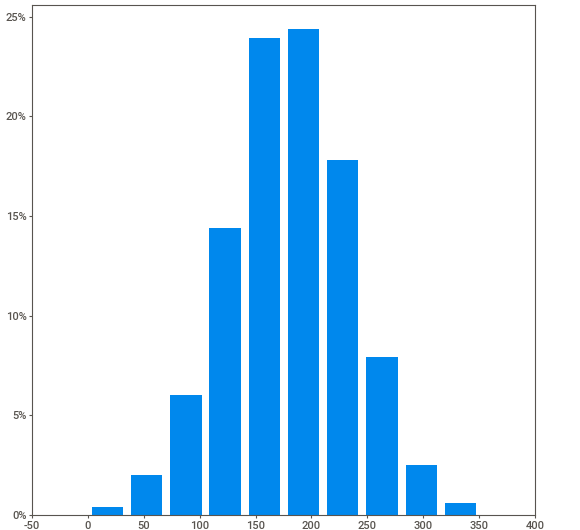
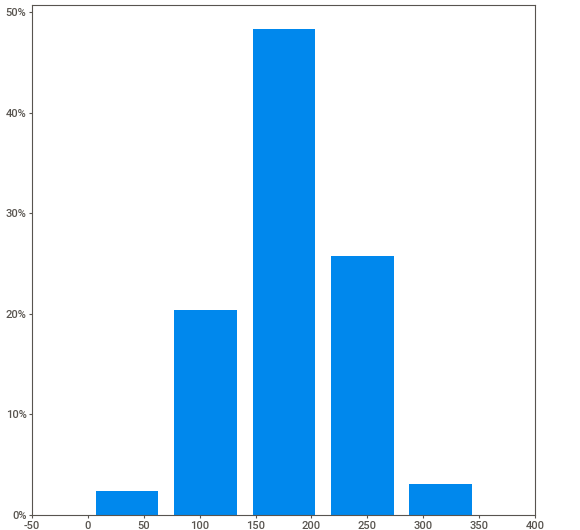
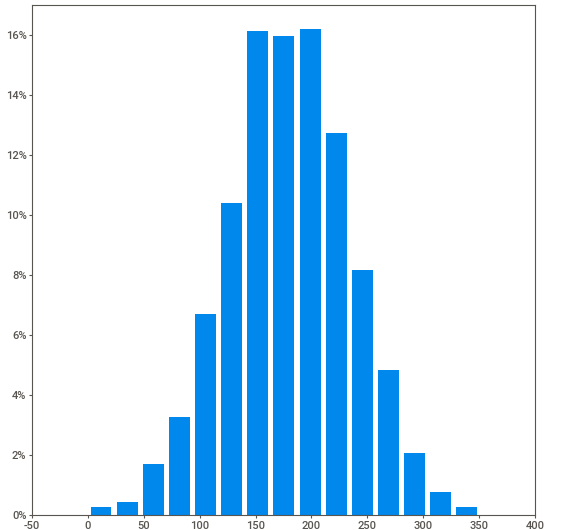
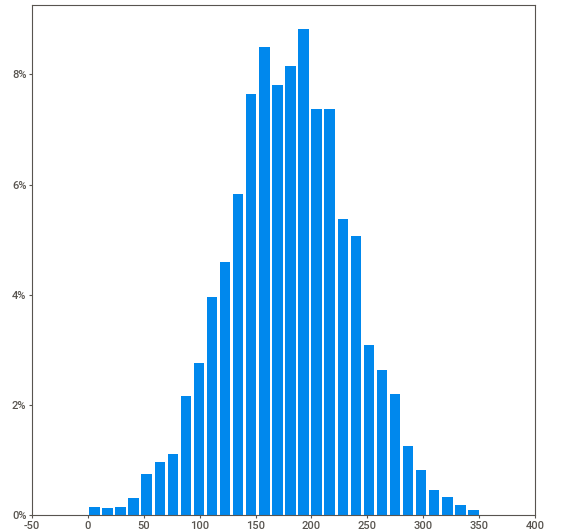
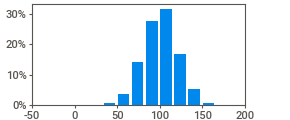
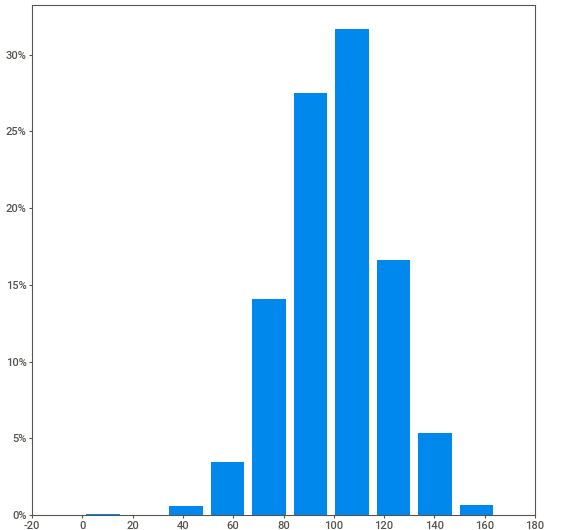
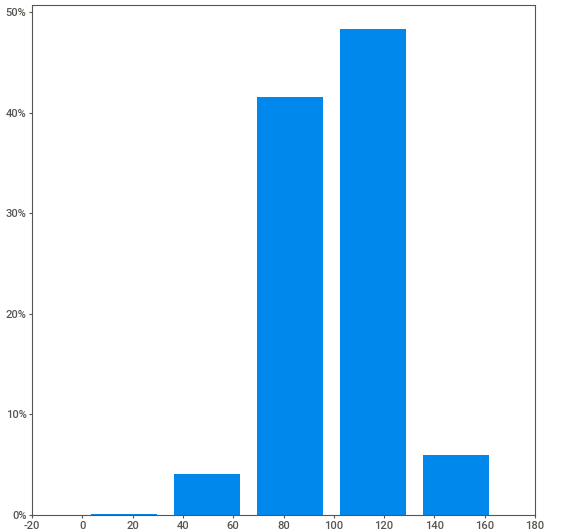
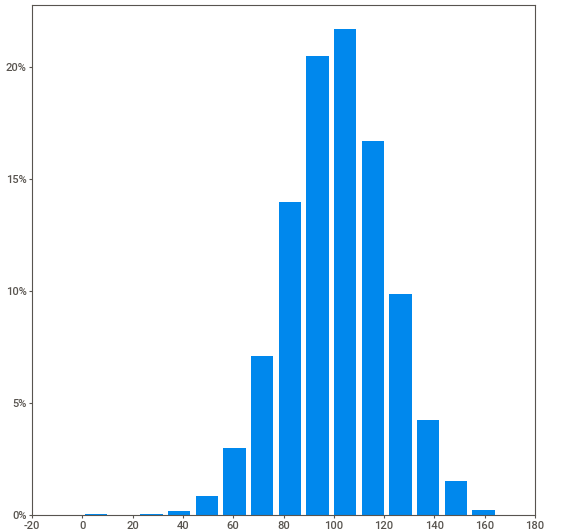
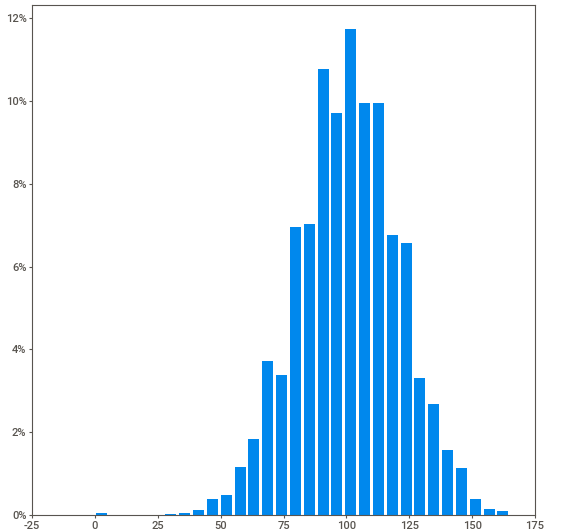
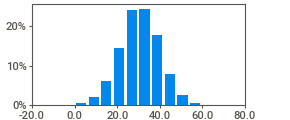
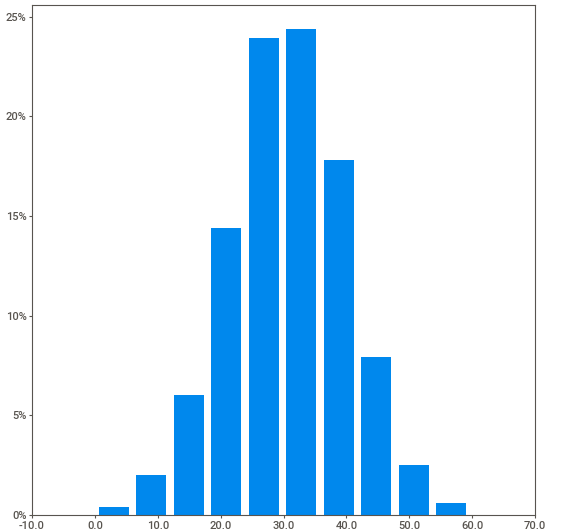
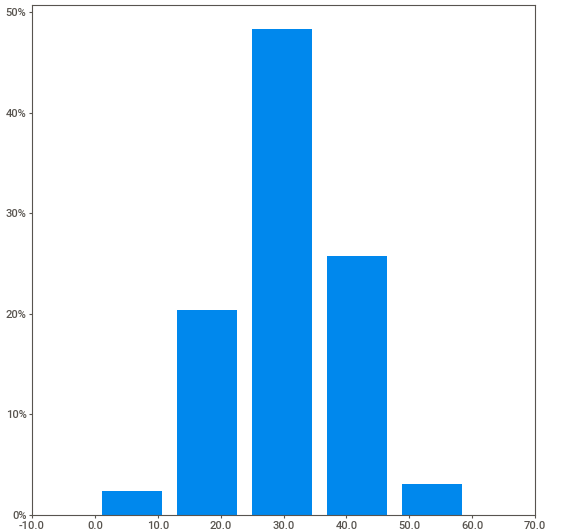
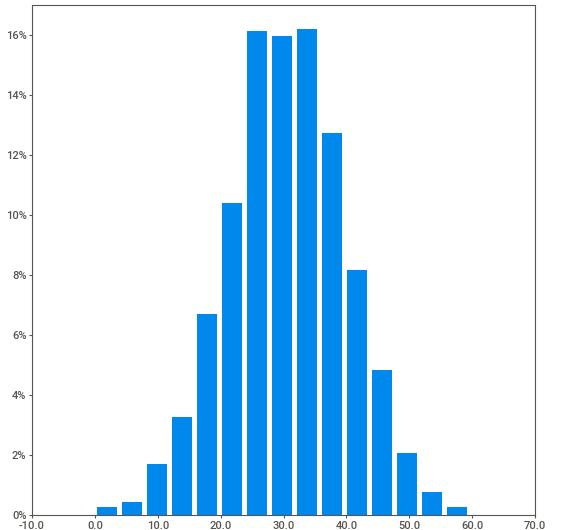
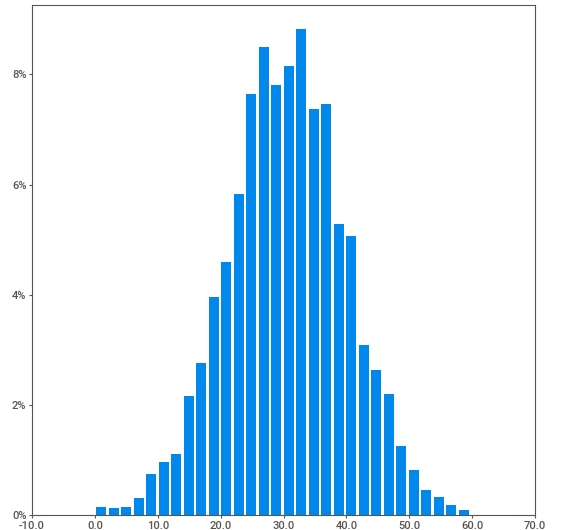
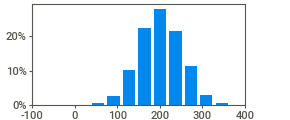
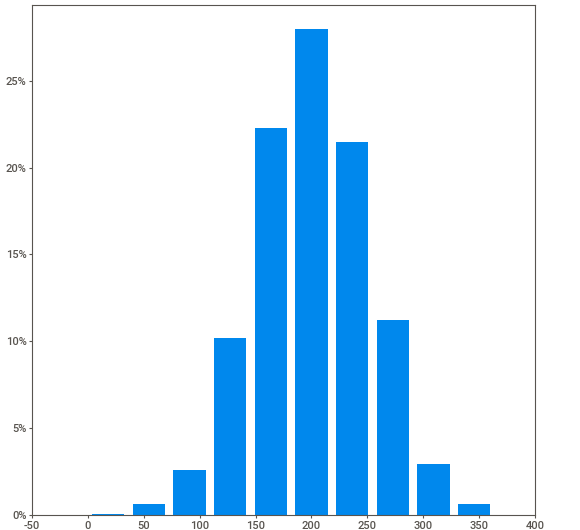
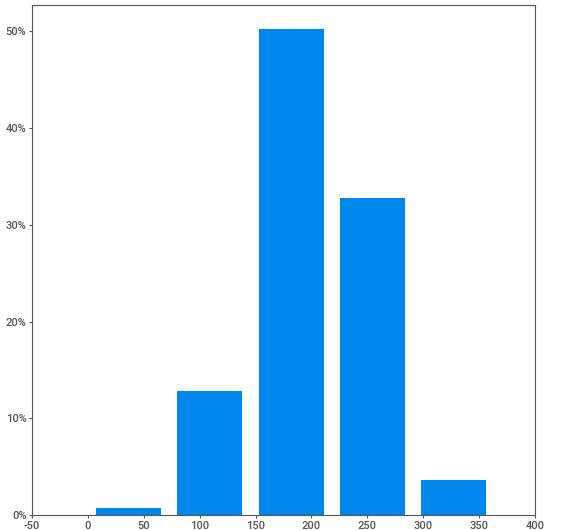
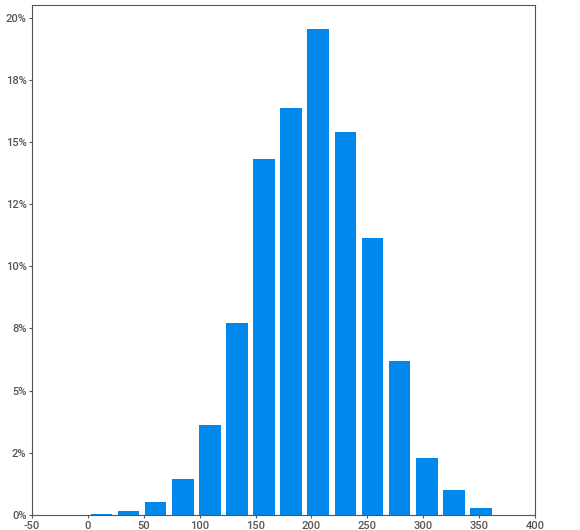
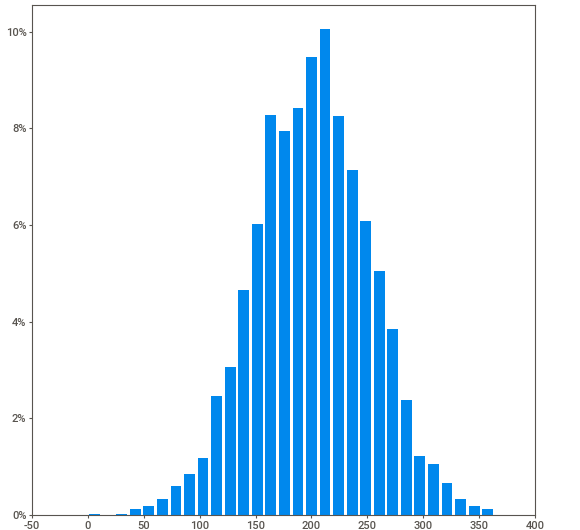
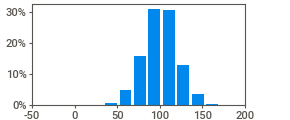
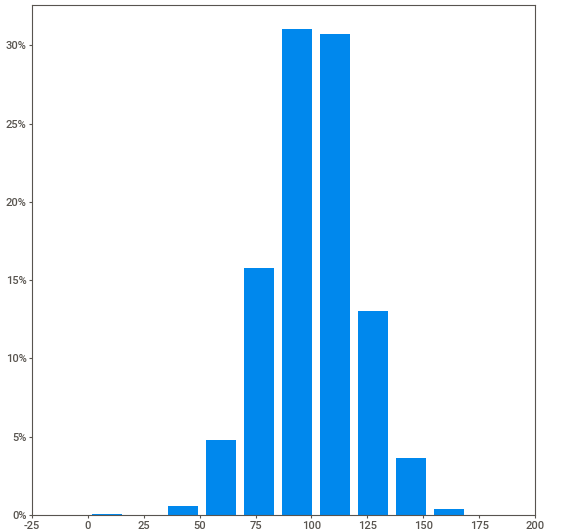
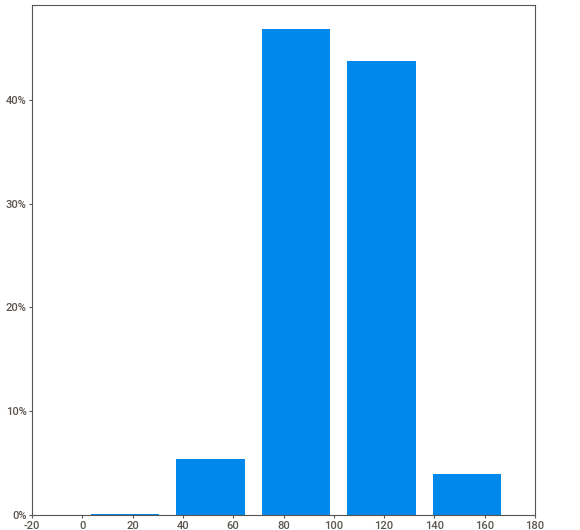
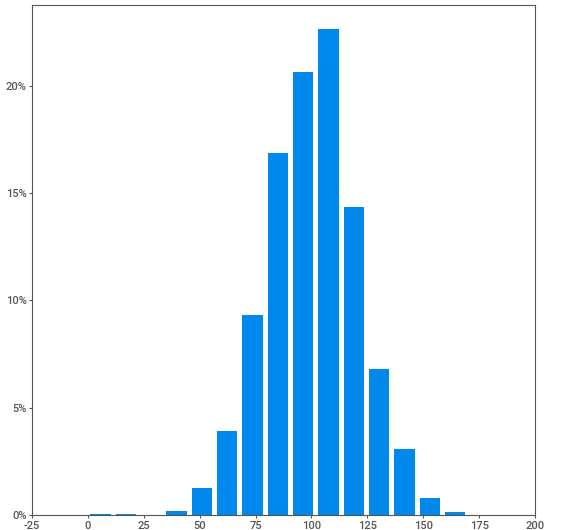
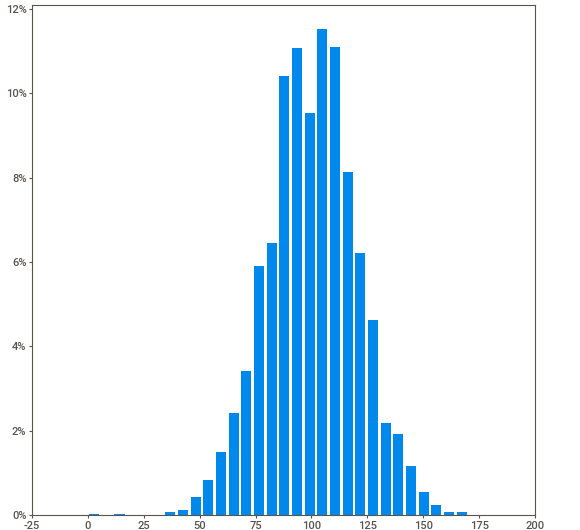
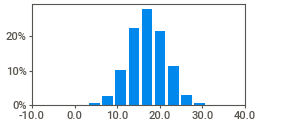
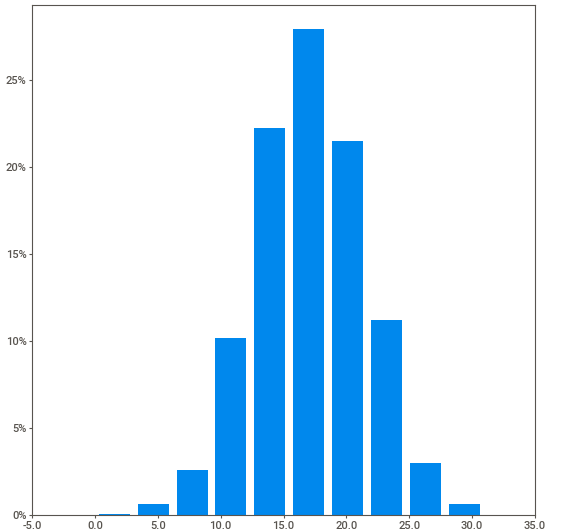
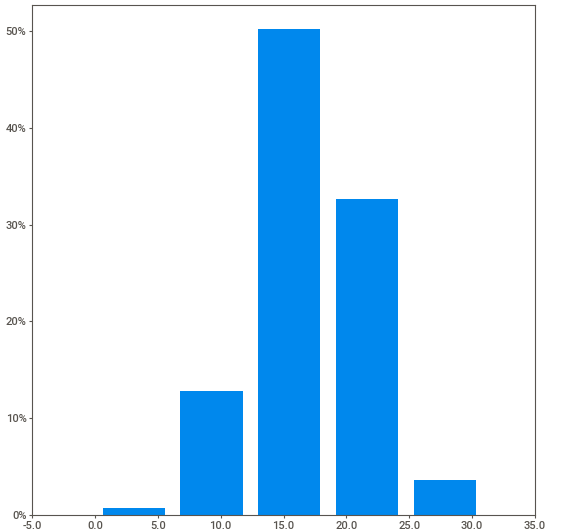
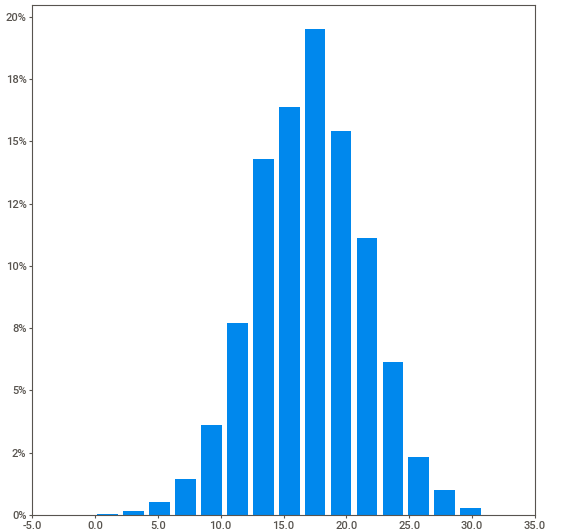
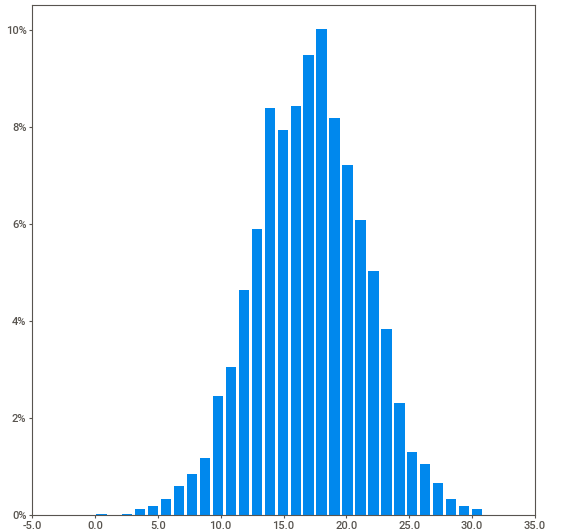
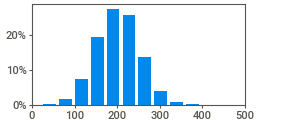
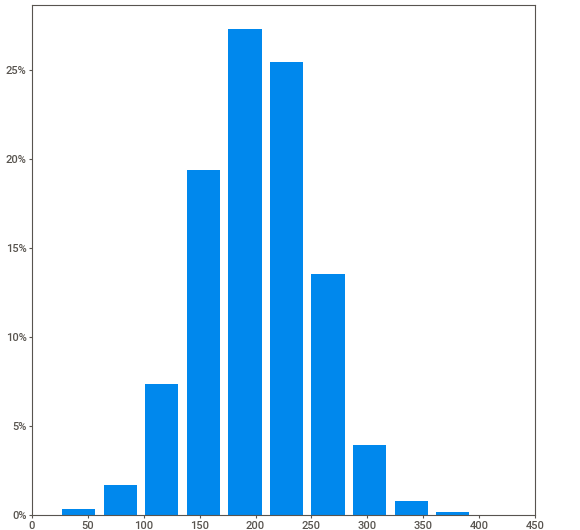
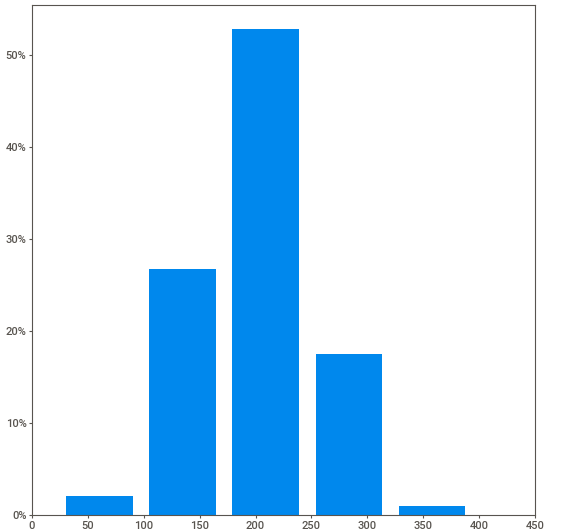
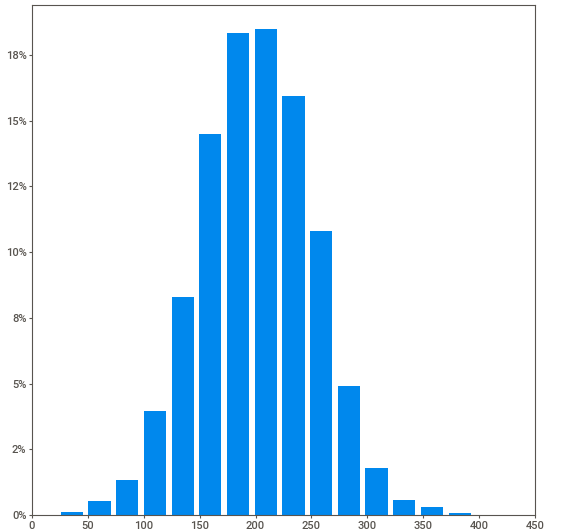
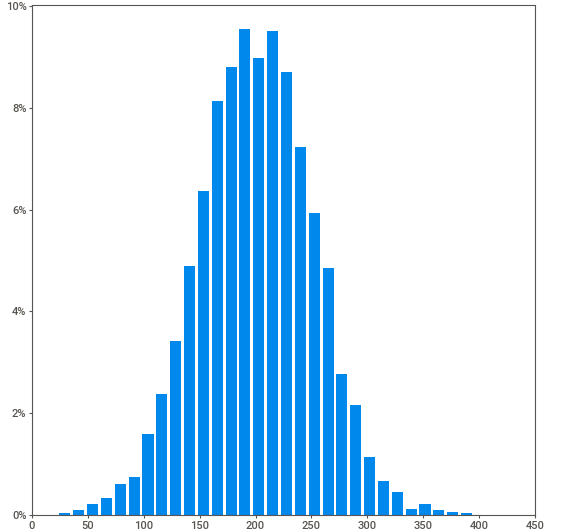
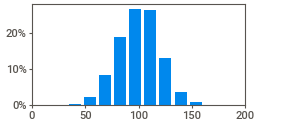
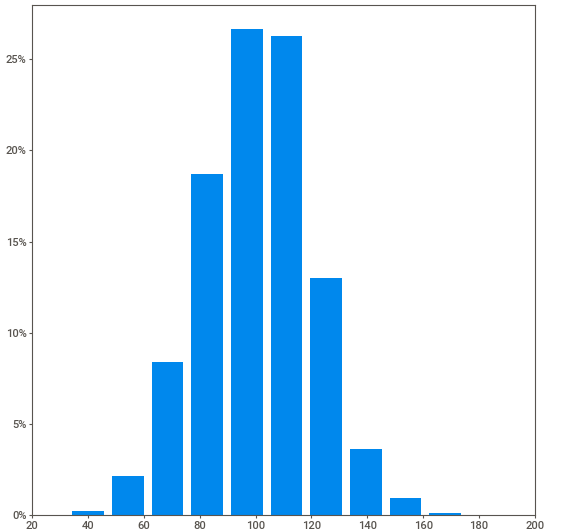
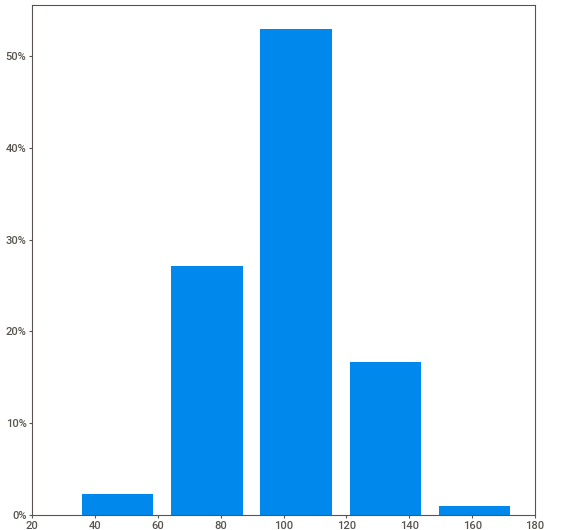
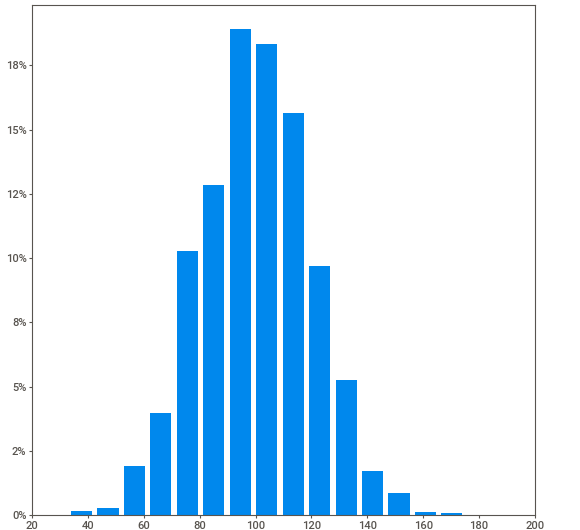
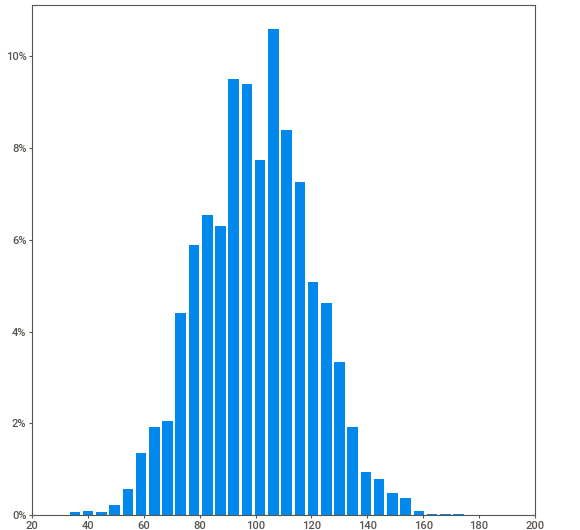
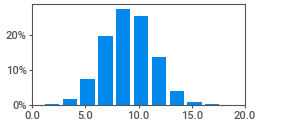
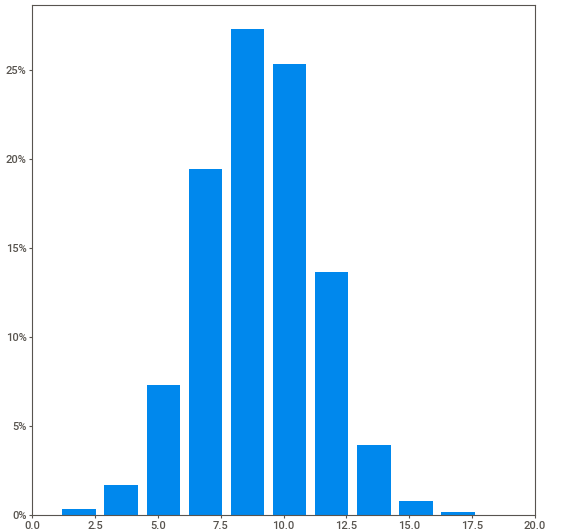
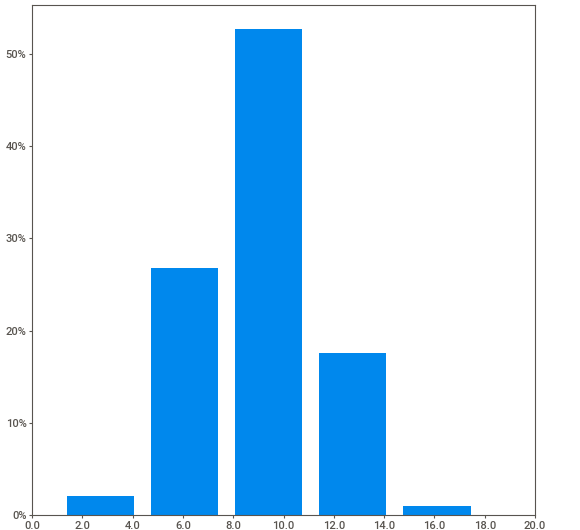
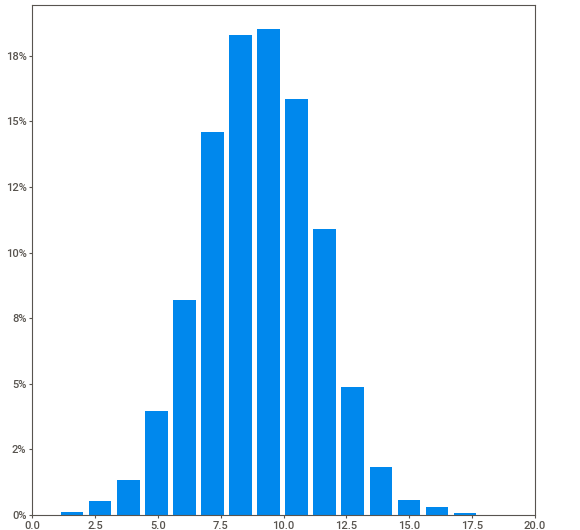
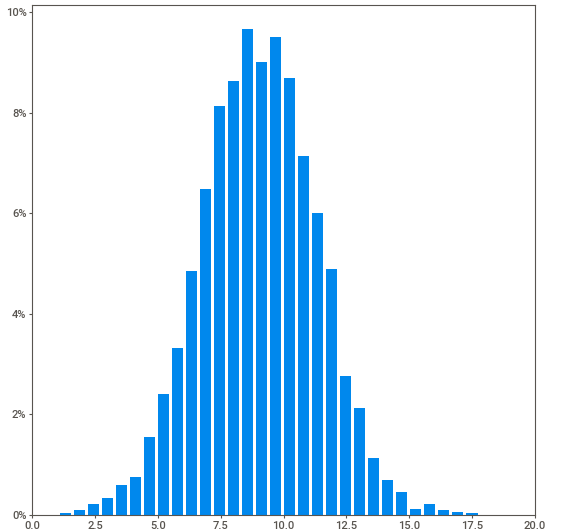
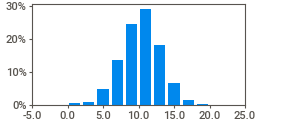
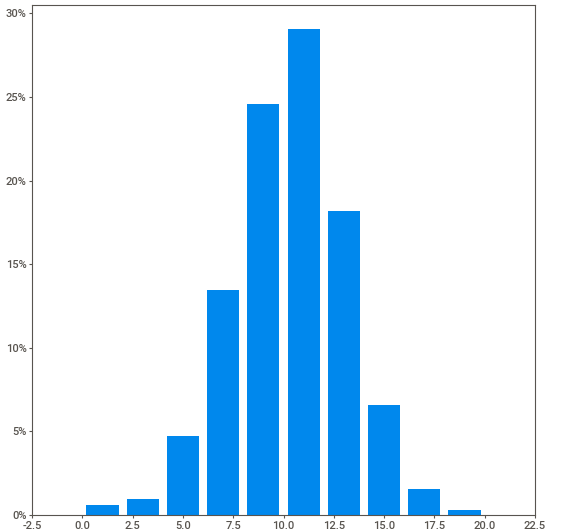
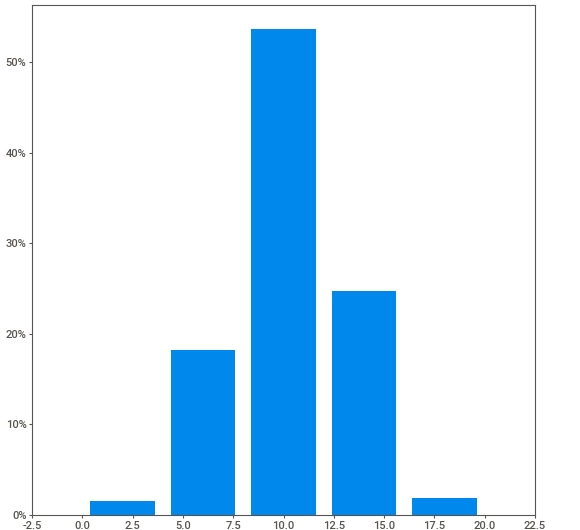
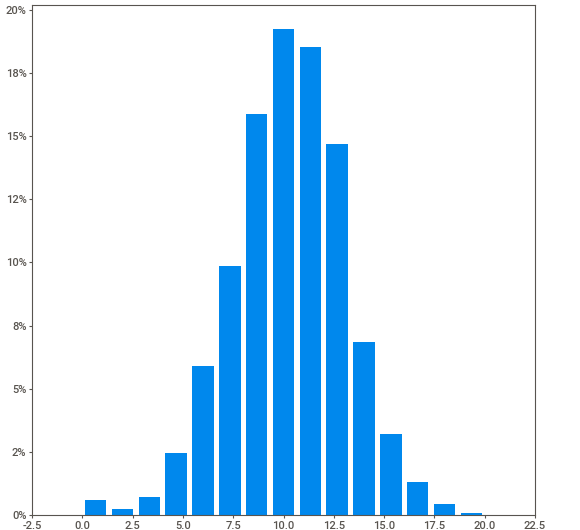
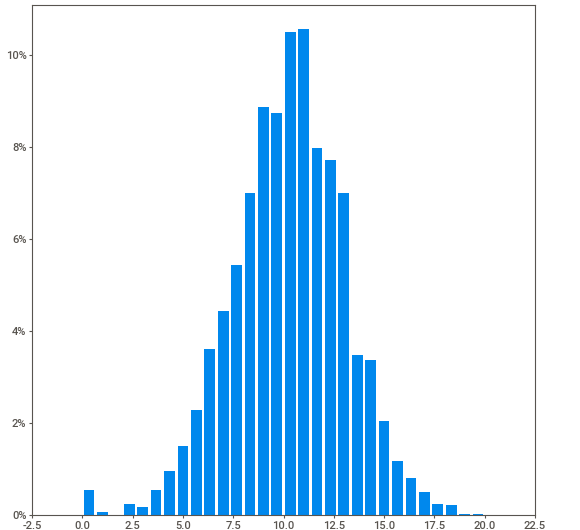
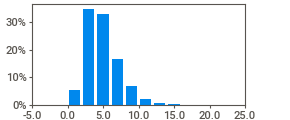
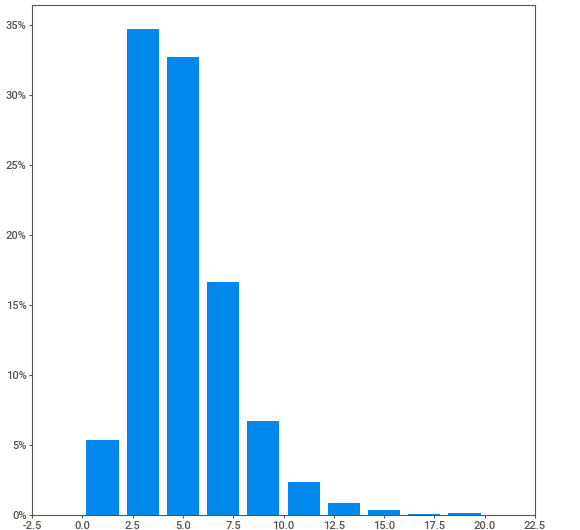
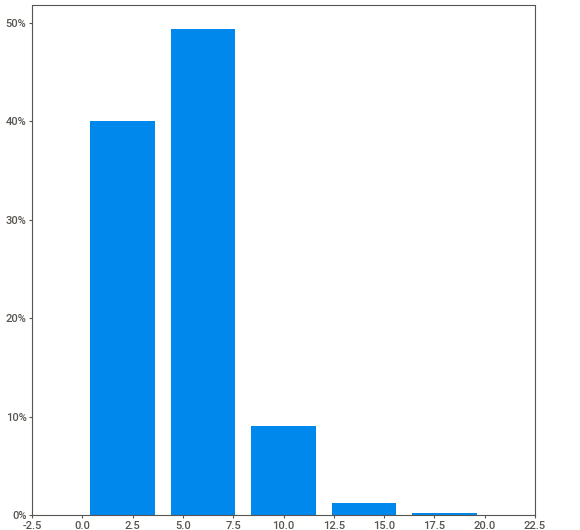
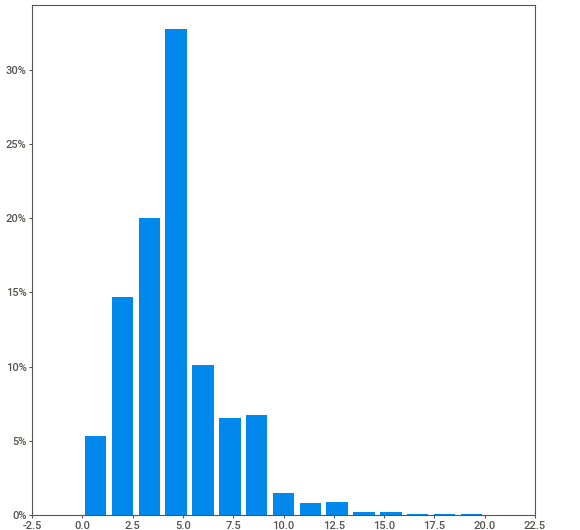
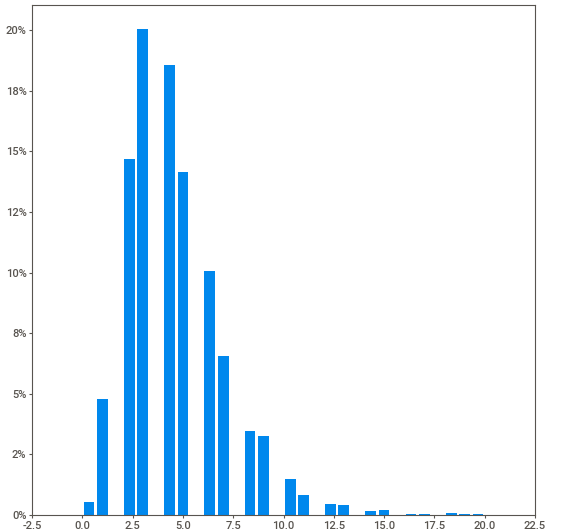
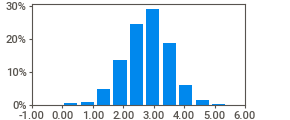
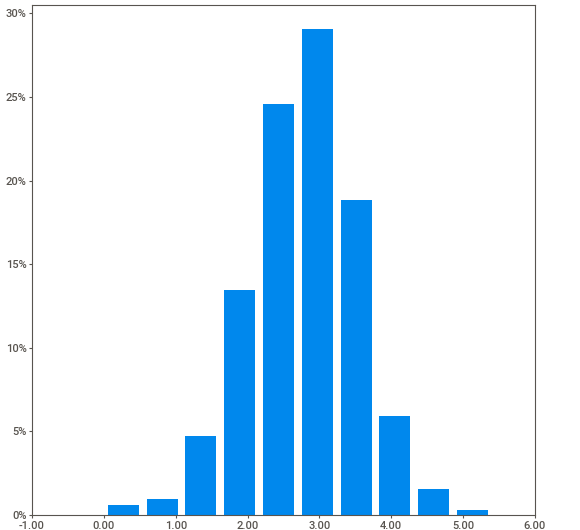
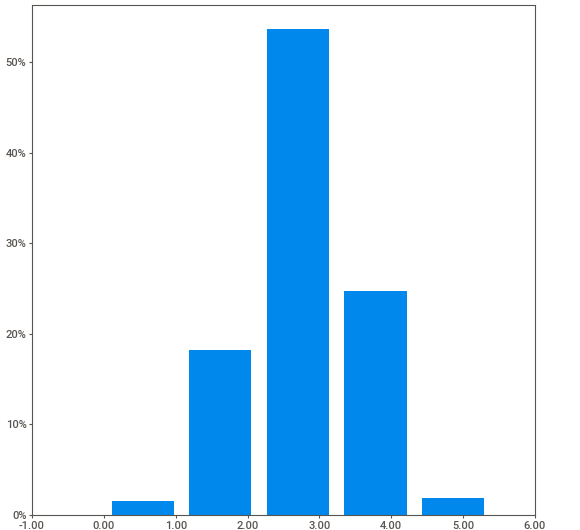
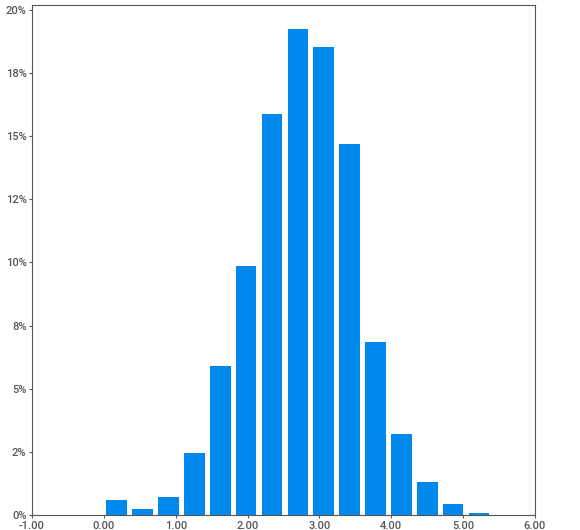
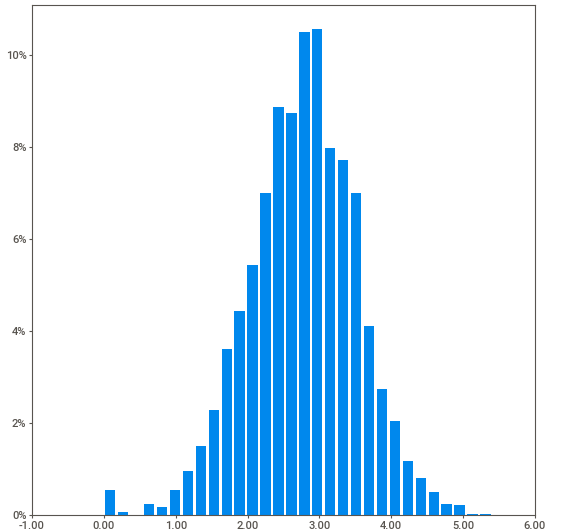
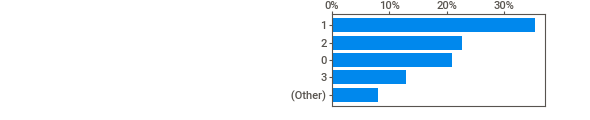
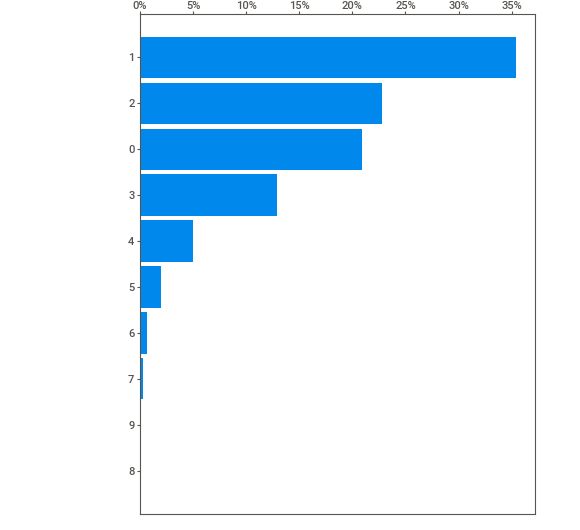
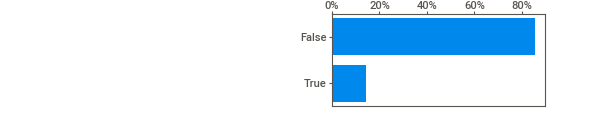
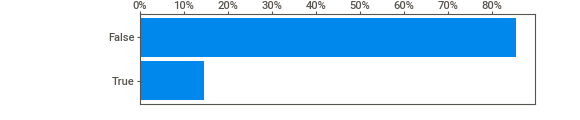
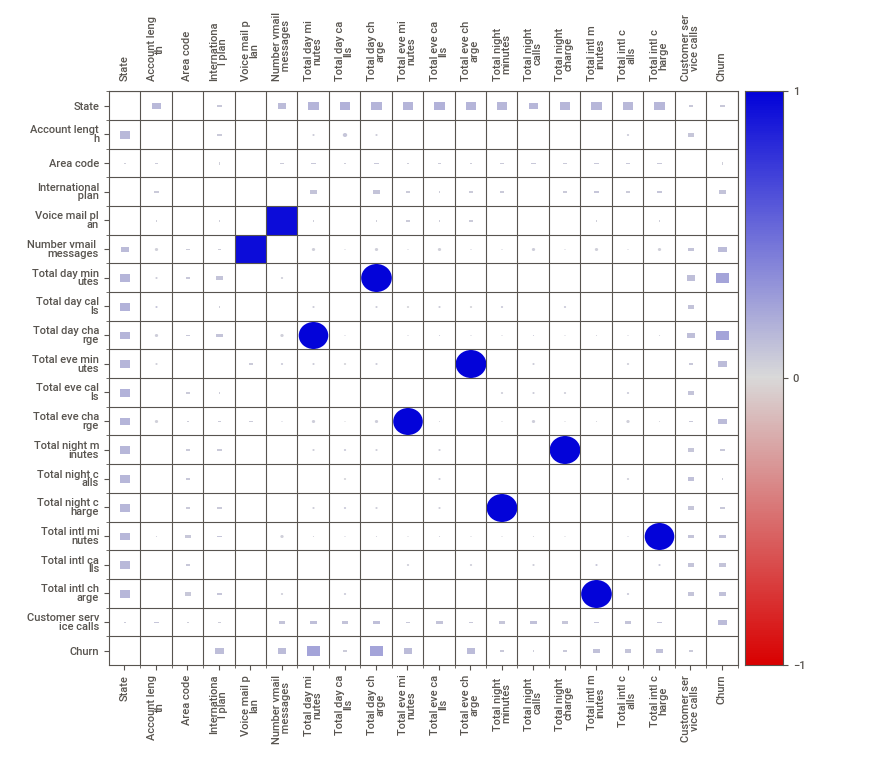
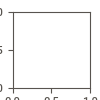

In [ ]:
import IPython
IPython.display.HTML('sweet_report.html')

Solution
We can set up a limit on voice mail service strictly no more than 25 voice mail.

Solve the network problem

The clients who have high call minutes and calls need a discount in the end.

Different pricing strategy and international calling rate optimization would lead to lower churn rate.

stay competitive



**Conclusion**

It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.

International plan users are more consistent with their churn w.r.t the ones who do not have the service.

Customers with the International Plan tend to churn more frequently.

Customers with four or more customer service calls churn more than four times as often as do the other customers.

Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers